<a href="https://colab.research.google.com/github/EduMBR/Classificacao-iris-dataset/blob/main/Oficina_1_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [ ]:
import pandas as pd
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [ ]:
caminho_dados_drive = "drive/MyDrive/PUC-BI-MASTER/bimaster-bi-sad-puc-rio-iris"
dados_iris = caminho_dados_drive + "/Iris.csv"
dados_sem_rotulo = caminho_dados_drive + "/Iris_teste_sem_rotulo.csv"

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dados = pd.read_csv(dados_iris)
dados

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
dados_teste = pd.read_csv(dados_sem_rotulo)
id_resposta = dados_teste['Id']
dados_teste = dados_teste[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
dados_teste

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


# Estatísticas descritivas

In [ ]:
dados_sem_id = dados[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']]
dados_sem_id

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
type(dados)

pandas.core.frame.DataFrame

In [ ]:
dados_sem_id.describe().round(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.00,150.00,150.00,150.00
mean,5.84,3.05,3.76,1.20
std,0.83,0.43,1.76,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


In [ ]:
dados_sem_id.corr().round(2)

<ipython-input-9-d8f7a057dae1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dados_sem_id.corr().round(2)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.00,-0.11,0.87,0.82
SepalWidthCm,-0.11,1.00,-0.42,-0.36
PetalLengthCm,0.87,-0.42,1.00,0.96
PetalWidthCm,0.82,-0.36,0.96,1.00


# Treino

In [ ]:
x = dados[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
x

In [ ]:
y = dados['Species']
y

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=2811)

In [ ]:
print(f'Shapes: x_train: {x_train.shape}, x_test: {x_test.shape}, y_train: {y_train.shape}, y_test: {y_test.shape}')

Shapes: x_train: (105, 4), x_test: (45, 4), y_train: (105,), y_test: (45,)


## SVC

In [ ]:
model_SVC = SVC()
model_SVC.fit(x_train,y_train)

SVC()

In [ ]:
y_predito_svc = model_SVC.predict(x_test)
y_predito_svc

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor'],
      dtype=object)

In [ ]:
model_SVC.score(x_test,y_test)

0.9555555555555556

In [ ]:
accuracy_score(y_test, y_predito_svc)

0.9555555555555556

In [ ]:
confusion_matrix(y_test, y_predito_svc)

array([[13,  0,  0],
       [ 0, 16,  1],
       [ 0,  1, 14]])

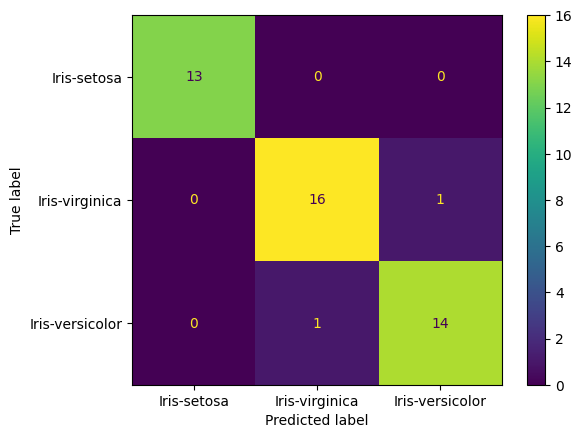

In [ ]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_predito_svc), display_labels=['Iris-setosa','Iris-virginica','Iris-versicolor']).plot()

## DecisionTreeClassifier

In [ ]:
model_DTC = DecisionTreeClassifier()
model_DTC.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_previsto_DTC = model_DTC.predict(x_test)
accuracy_score(y_test,y_previsto_DTC)

0.9333333333333333

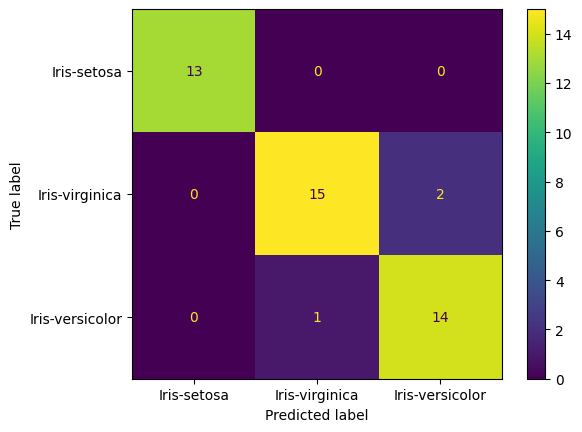

In [ ]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_previsto_DTC), display_labels=['Iris-setosa','Iris-virginica','Iris-versicolor']).plot()

## LogisticRegression

In [ ]:
model_LR = LogisticRegression()
model_LR.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_previsto_LR = model_LR.predict(x_test)
accuracy_score(y_test,y_previsto_LR)

0.9333333333333333

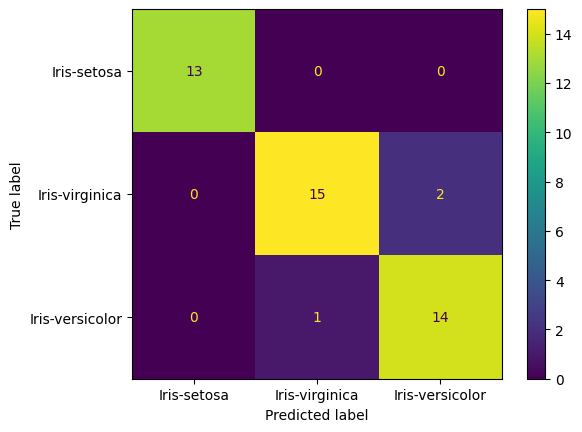

In [ ]:
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_previsto_LR), display_labels=['Iris-setosa','Iris-virginica','Iris-versicolor']).plot()

## Teste

In [ ]:
r1 = model_SVC.predict(dados_teste)

In [ ]:
r2 = model_DTC.predict(dados_teste)

In [ ]:
r3 = model_LR.predict(dados_teste)

# Resposta - Output

In [ ]:
resposta = {'Id': list(id_resposta),'Species': list(r1)}
resposta = pd.DataFrame(resposta).set_index('Id')
resposta

,Species
Id,
151,Iris-setosa
152,Iris-setosa
153,Iris-setosa
154,Iris-setosa
155,Iris-setosa
...,...
296,Iris-virginica
297,Iris-virginica
298,Iris-virginica


In [ ]:
resposta.to_csv(path_or_buf='prediction.csv')